**Delivery_Time**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


**EDA **


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
data[data.duplicated()].shape

(0, 2)

In [ ]:
data.shape

(21, 2)

<ipython-input-145-7bc6d5121b9c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Delivery Time'])
<ipython-input-145-7bc6d5121b9c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

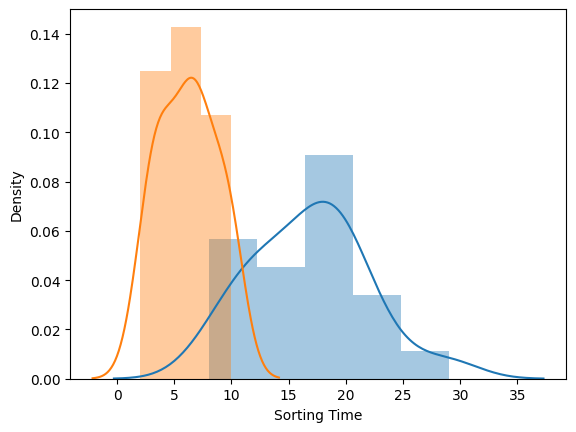

In [ ]:
sns.distplot(data['Delivery Time'])
sns.distplot(data['Sorting Time'])

In [ ]:
data=data.rename({'Delivery Time':'deli', 'Sorting Time':'sort'},axis=1)
data


,deli,sort
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
data.corr()

,deli,sort
deli,1.000000,0.825997
sort,0.825997,1.000000


<Axes: xlabel='sort', ylabel='deli'>

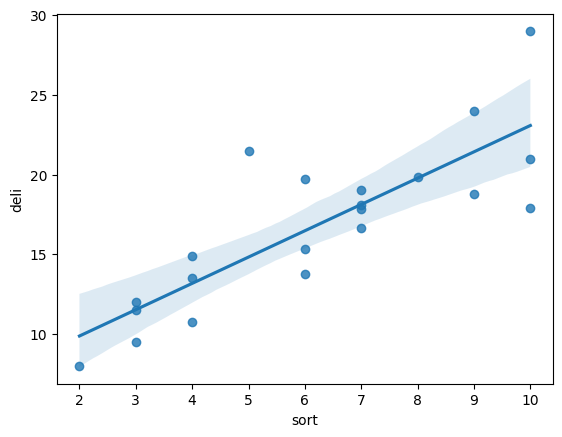

In [ ]:
sns.regplot(x=data['sort'],y=data['deli'])

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("deli~sort",data=data).fit()

In [ ]:
model=smf.ols("deli~sort",data=data).fit()

In [ ]:
model.params

Intercept    6.582734
sort         1.649020
dtype: float64

In [ ]:
model.tvalues,model.pvalues

(Intercept    3.823349
 sort         6.387447
 dtype: float64,
 Intercept    0.001147
 sort         0.000004
 dtype: float64)

In [ ]:
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [ ]:
model_1 = smf.ols("np.log(deli)~sort",data = data).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(deli)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.59e-06
Time:                        10:52:31   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
sort           0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
newdata=pd.Series([10,15,20])

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sort'])

In [ ]:
model.predict(data_pred)

0    23.072933
1    31.318032
2    39.563132
dtype: float64

**Salary Hike**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [ ]:
sal=pd.read_csv('Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
sal.shape

(30, 2)

**EDA**

In [ ]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
sal[sal.duplicated()].shape


(0, 2)

<ipython-input-163-5a329d40937b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

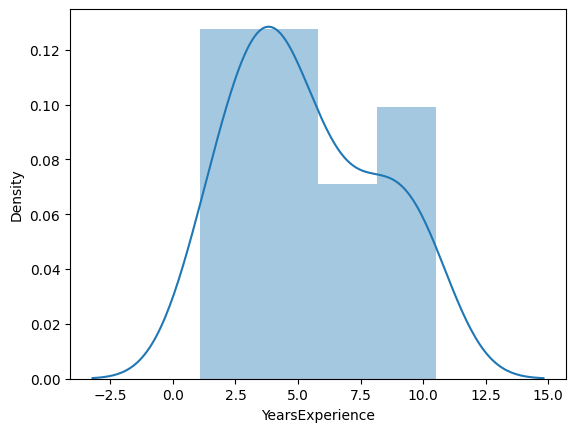

In [ ]:
sns.distplot(sal['YearsExperience'])


<ipython-input-164-1678b393937a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sal['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

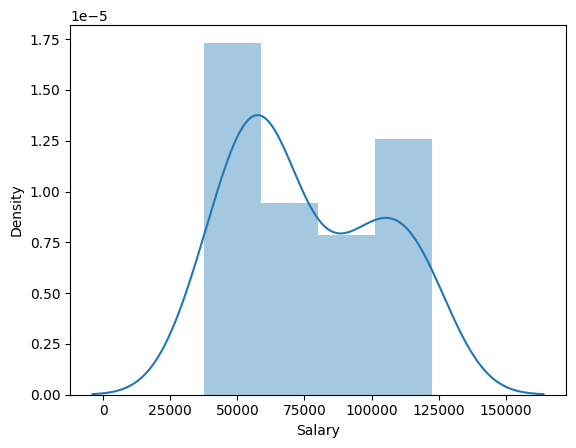

In [ ]:
sns.distplot(sal['Salary'])

<Axes: >

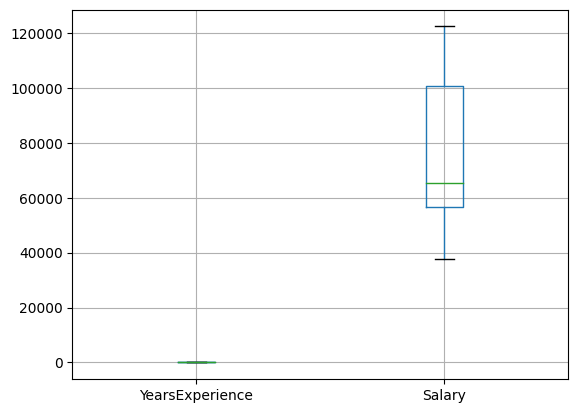

In [ ]:
sal.boxplot()

In [ ]:
corre=sal.corr()
corre


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

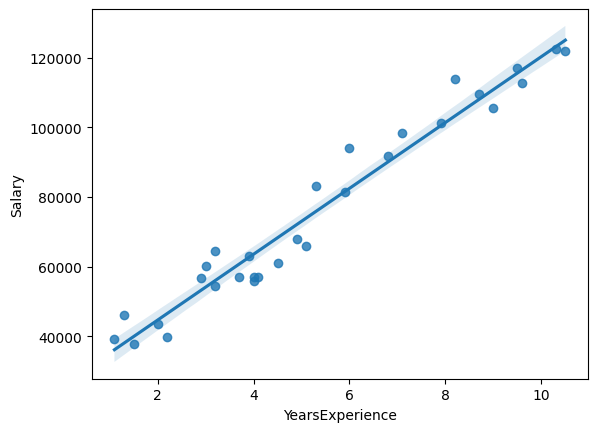

In [ ]:
sns.regplot(x=sal['YearsExperience'],y=sal['Salary'])

In [ ]:
pandas= smf.ols("Salary~YearsExperience",data = sal).fit()
pandas.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.14e-20
Time:                        10:52:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pandas.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
pandas.tvalues , pandas.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [ ]:
pandas.rsquared , pandas.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [ ]:
pandas_1= smf.ols("np.log(YearsExperience)~Salary",data = sal).fit()
pandas_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(YearsExperience)   R-squared:                       0.854
Model:                                 OLS   Adj. R-squared:                  0.849
Method:                      Least Squares   F-statistic:                     163.6
Date:                     Fri, 19 May 2023   Prob (F-statistic):           3.25e-13
Time:                             10:52:32   Log-Likelihood:                0.92814
No. Observations:                       30   AIC:                             2.144
Df Residuals:                           28   BIC:                             4.946
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0942      0.133     -0.710      0.483      -0.366       0.178
Salary      2.104e-05   1.64e-06     12.792      0.000    1.77e-05    2.44e-05
==============================================================================
Omnibus:                        7.529   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                5.772
Skew:                          -0.923   Prob(JB):                       0.0558
Kurtosis:                       4.099   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pandas_1.params

Intercept   -0.094207
Salary       0.000021
dtype: float64

In [ ]:
pandas_1.tvalues , pandas_1.pvalues

(Intercept    -0.710225
 Salary       12.791989
 dtype: float64,
 Intercept    4.834387e-01
 Salary       3.250155e-13
 dtype: float64)

In [ ]:
pandas_1.rsquared , pandas_1.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [ ]:
# Automatic Prediction for say 3 & 5 Years Experience 

newdata=pd.Series([3,5])
newdata

0    3
1    5
dtype: int64

In [ ]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])
data_pred


,YearsExperience
0,3
1,5


In [ ]:
data_pred=pd.DataFrame(newdata,columns=['sort'])

In [ ]:
model.predict(data_pred)


0    11.529794
1    14.827833
dtype: float64